<a href="https://colab.research.google.com/github/SaiKrishhna2001/FSSE-Project-2/blob/main/FSSE_Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

E-k Diagram of Intrinsic Silicon and GaAs


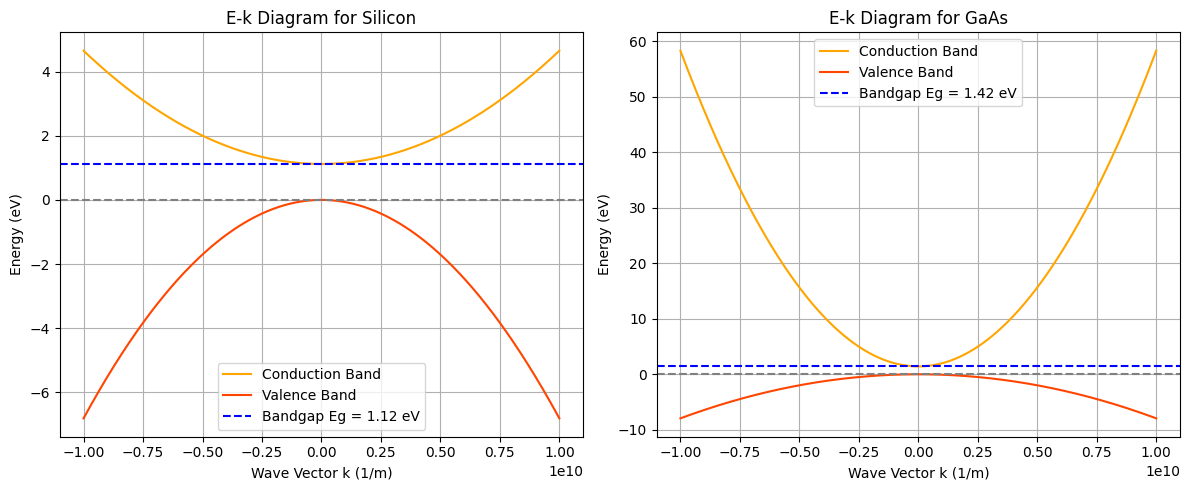

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# Constants
hbar = 1.055e-34  # Reduced Planck's constant (J.s)
q = 1.602e-19     # Elementary charge (C)
m0 = 9.11e-31     # Electron rest mass (kg)

# Define wave vector range
k = np.linspace(-1e10, 1e10, 500)  # in m^-1
# Material parameters: (electron mass, hole mass, bandgap in eV)
materials = {
    "Silicon": {
        "me": 1.08,  # effective mass of electron (×m0)
        "mh": 0.56,  # effective mass of hole (×m0)
        "Eg": 1.12   # bandgap in eV
    },
    "GaAs": {
        "me": 0.067,
        "mh": 0.48,
        "Eg": 1.42
    }
}
# Parabolic E(k) relation
def energy_band(k, m_eff, is_conduction=True, Eg=0):
    E = (hbar**2 * k**2) / (2 * m_eff * m0) / q  # Energy in eV
    return E + Eg if is_conduction else -E
# Plotting
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
for i, (material, props) in enumerate(materials.items()):
    me, mh, Eg = props["me"], props["mh"], props["Eg"]
    Ec = energy_band(k, me, True, 0) + Eg  # conduction band
    Ev = energy_band(k, mh, False, 0)      # valence band
    axs[i].plot(k, Ec, label="Conduction Band", color='orange')
    axs[i].plot(k, Ev, label="Valence Band", color='orangered')
    axs[i].axhline(0, color='gray', linestyle='--')
    axs[i].axhline(Eg, color='blue', linestyle='--', label=f"Bandgap Eg = {Eg} eV")
    axs[i].set_title(f"E-k Diagram for {material}")
    axs[i].set_xlabel("Wave Vector k (1/m)")
    axs[i].set_ylabel("Energy (eV)")
    axs[i].legend()
    axs[i].grid(True)
plt.tight_layout()
plt.show()


Effect of Temperature on Carrier Distribution


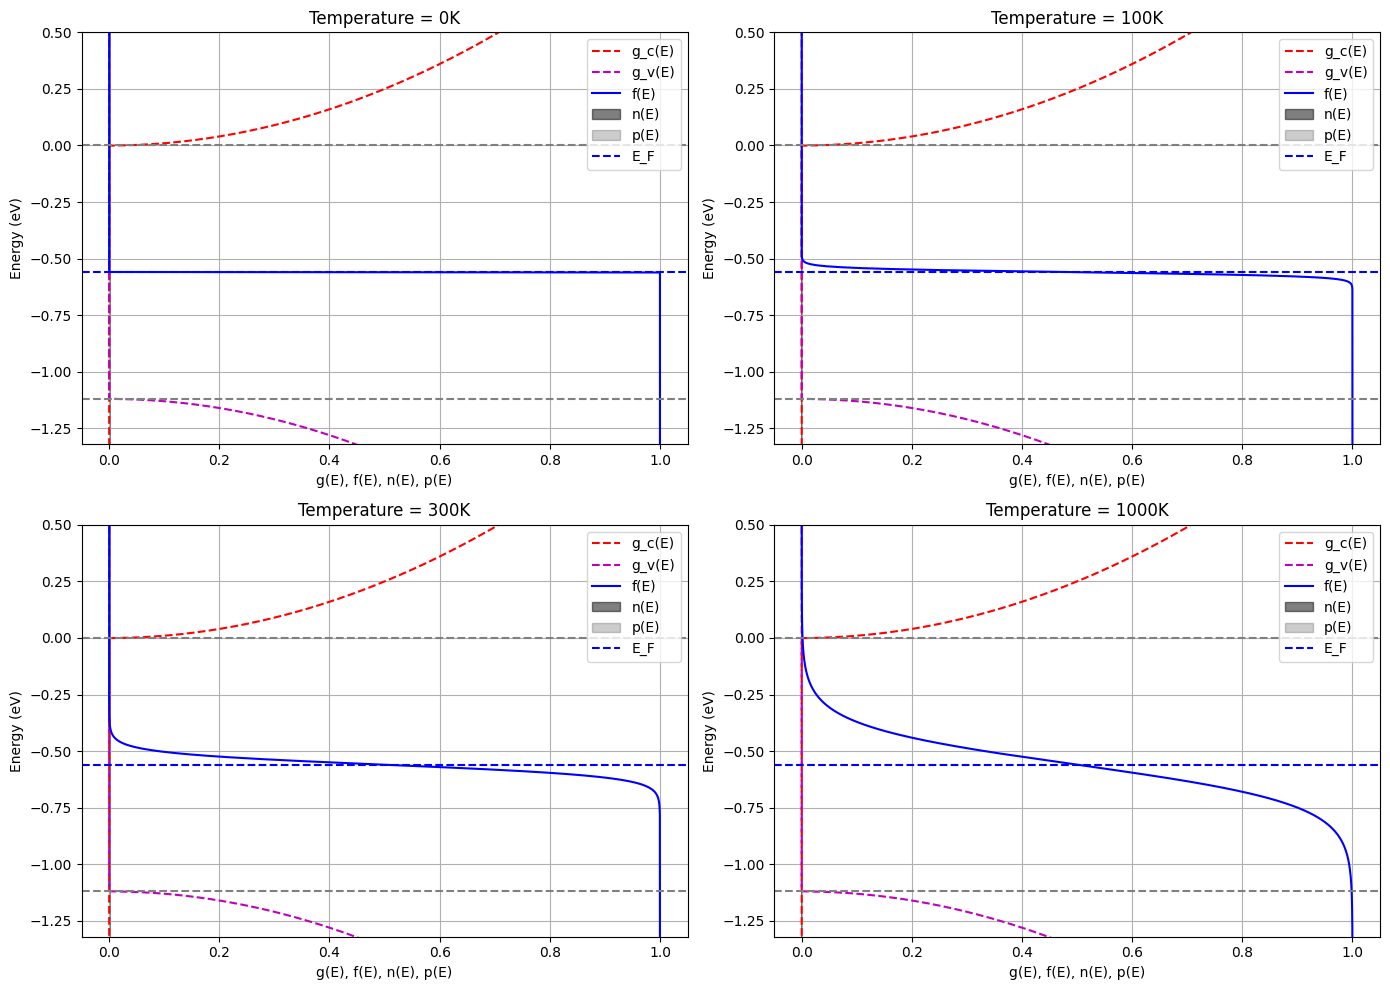

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
k_B = 8.617e-5     # Boltzmann constant (eV/K)
Eg = 1.12          # Bandgap of Silicon (eV)
Ec = 0             # Conduction band edge
Ev = -Eg           # Valence band edge
E = np.linspace(Ev - 0.5, Ec + 0.5, 1000)  # Energy range
Ef = (Ec + Ev) / 2  # Intrinsic Fermi level

# Fermi-Dirac function
def fermi(E, Ef, T):
    return 1 / (1 + np.exp((E - Ef) / (k_B * T)))

# Density of states (sqrt dependency)
def density_of_states(E, edge, is_conduction=True):
    DOS = np.zeros_like(E)
    if is_conduction:
        mask = E >= edge
        DOS[mask] = np.sqrt(E[mask] - edge)
    else:
        mask = E <= edge
        DOS[mask] = np.sqrt(edge - E[mask])
    return DOS

# Plotting at different temperatures
temps = [0, 100, 300, 1000]
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
axs = axs.flatten()

for i, T in enumerate(temps):
    f_E = np.where(E < Ef, 1, 0) if T == 0 else fermi(E, Ef, T)
    gc = density_of_states(E, Ec, True)
    gv = density_of_states(E, Ev, False)
    n_E = gc * f_E
    p_E = gv * (1 - f_E)

    ax = axs[i]
    ax.plot(gc, E, 'r--', label='g_c(E)')
    ax.plot(gv, E, 'm--', label='g_v(E)')
    ax.plot(f_E, E, 'b-', label='f(E)')
    ax.fill_betweenx(E, 0, n_E, color='black', alpha=0.5, label='n(E)')
    ax.fill_betweenx(E, 0, p_E, color='black', alpha=0.2, label='p(E)')
    ax.axhline(Ec, color='gray', linestyle='--')
    ax.axhline(Ev, color='gray', linestyle='--')
    ax.axhline(Ef, color='blue', linestyle='--', label='E_F')
    ax.set_title(f'Temperature = {T}K')
    ax.set_xlabel('g(E), f(E), n(E), p(E)')
    ax.set_ylabel('Energy (eV)')
    ax.set_ylim(Ev - 0.2, Ec + 0.5)
    ax.grid(True)
    ax.legend(loc='upper right')

plt.tight_layout()
plt.show()


Effect of Doping on Carrier Distribution at 300K


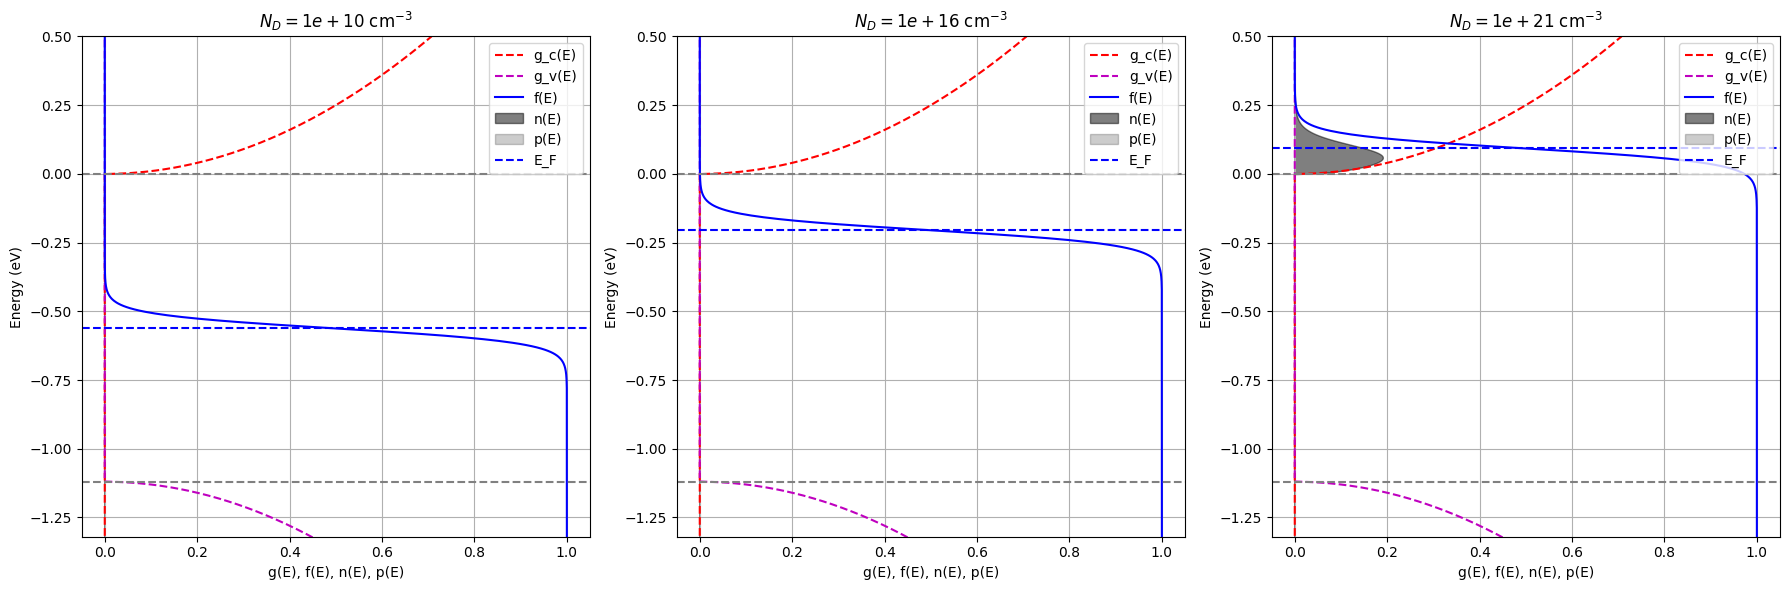

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
k_B = 8.617e-5
T = 300  # Fixed temperature
Eg = 1.12
Ec = 0
Ev = -Eg
E = np.linspace(Ev - 0.5, Ec + 0.5, 1000)
Nc = 2.8e19  # Effective DOS in conduction band

# Doping levels
doping_levels = [1e10, 1e16, 1e21]

# Fermi-Dirac distribution
def fermi(E, Ef, T):
    return 1 / (1 + np.exp((E - Ef) / (k_B * T)))

# Density of states
def density_of_states(E, edge, is_conduction=True):
    DOS = np.zeros_like(E)
    if is_conduction:
        mask = E >= edge
        DOS[mask] = np.sqrt(E[mask] - edge)
    else:
        mask = E <= edge
        DOS[mask] = np.sqrt(edge - E[mask])
    return DOS

# Plot
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
for i, Nd in enumerate(doping_levels):
    Ef_doped = Ec - k_B * T * np.log(Nc / Nd)
    f_E = fermi(E, Ef_doped, T)
    gc = density_of_states(E, Ec, True)
    gv = density_of_states(E, Ev, False)
    n_E = gc * f_E
    p_E = gv * (1 - f_E)

    ax = axs[i]
    ax.plot(gc, E, 'r--', label='g_c(E)')
    ax.plot(gv, E, 'm--', label='g_v(E)')
    ax.plot(f_E, E, 'b-', label='f(E)')
    ax.fill_betweenx(E, 0, n_E, color='black', alpha=0.5, label='n(E)')
    ax.fill_betweenx(E, 0, p_E, color='black', alpha=0.2, label='p(E)')
    ax.axhline(Ec, color='gray', linestyle='--')
    ax.axhline(Ev, color='gray', linestyle='--')
    ax.axhline(Ef_doped, color='blue', linestyle='--', label='E_F')
    ax.set_title(f'$N_D = {Nd:.0e}$ cm$^{{-3}}$')
    ax.set_xlabel('g(E), f(E), n(E), p(E)')
    ax.set_ylabel('Energy (eV)')
    ax.set_ylim(Ev - 0.2, Ec + 0.5)
    ax.grid(True)
    ax.legend(loc='upper right')

plt.tight_layout()
plt.show()


J–V Characteristics with Field-Dependent Mobility

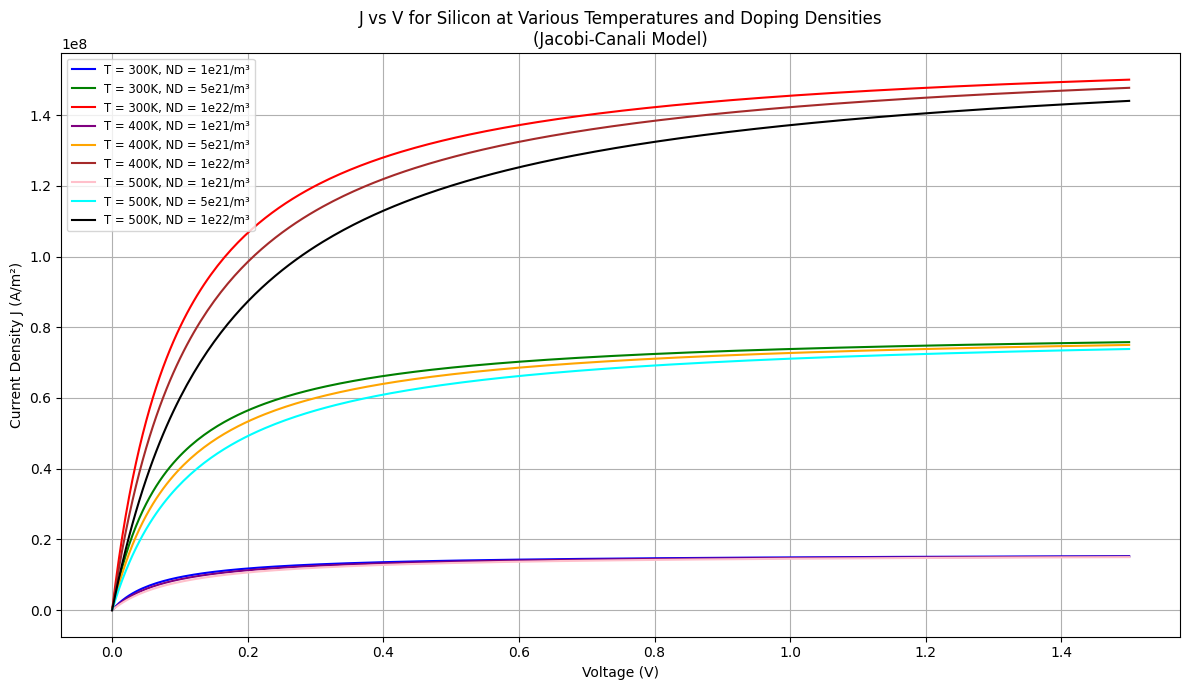

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
q = 1.6e-19  # Charge of electron (C)
L = 100e-9   # Length of the wire (m)
A = 1e-6 * 1e-9  # Cross-sectional area (m^2), not needed for current density
V = np.linspace(0, 1.5, 300)  # Voltage range (V)
E = V / L  # Electric field (V/m)

# Jacobi-Canali mobility model
def mobility(mu0, vsat, beta, E):
    return mu0 / ((1 + (mu0 * E / vsat) ** beta) ** (1 / beta))

# Parameters
temperature_labels = ['300K', '400K', '500K']
doping_labels = ['1e21', '5e21', '1e22']  # in m^-3
vsat = 1e5  # Saturation velocity (m/s)
beta = 1    # Empirical fitting parameter

# Example mobility values (m^2/Vs) for (T, ND) combinations
mobility_values = {
    '300K': [0.14, 0.12, 0.10],
    '400K': [0.12, 0.10, 0.08],
    '500K': [0.10, 0.08, 0.06]
}

# Plotting
plt.figure(figsize=(12, 7))
colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown', 'pink', 'cyan', 'black']

for i, T in enumerate(temperature_labels):
    for j, ND in enumerate(doping_labels):
        mu0 = mobility_values[T][j]
        n = float(ND)
        mu_E = mobility(mu0, vsat, beta, E)
        J = q * n * mu_E * E
        label = f"T = {T}, ND = {ND}/m³"
        color_index = i * len(doping_labels) + j
        plt.plot(V, J, label=label, color=colors[color_index % len(colors)])

plt.xlabel("Voltage (V)")
plt.ylabel("Current Density J (A/m²)")
plt.title("J vs V for Silicon at Various Temperatures and Doping Densities\n(Jacobi-Canali Model)")
plt.grid(True)
plt.legend(fontsize='small')
plt.tight_layout()
plt.show()


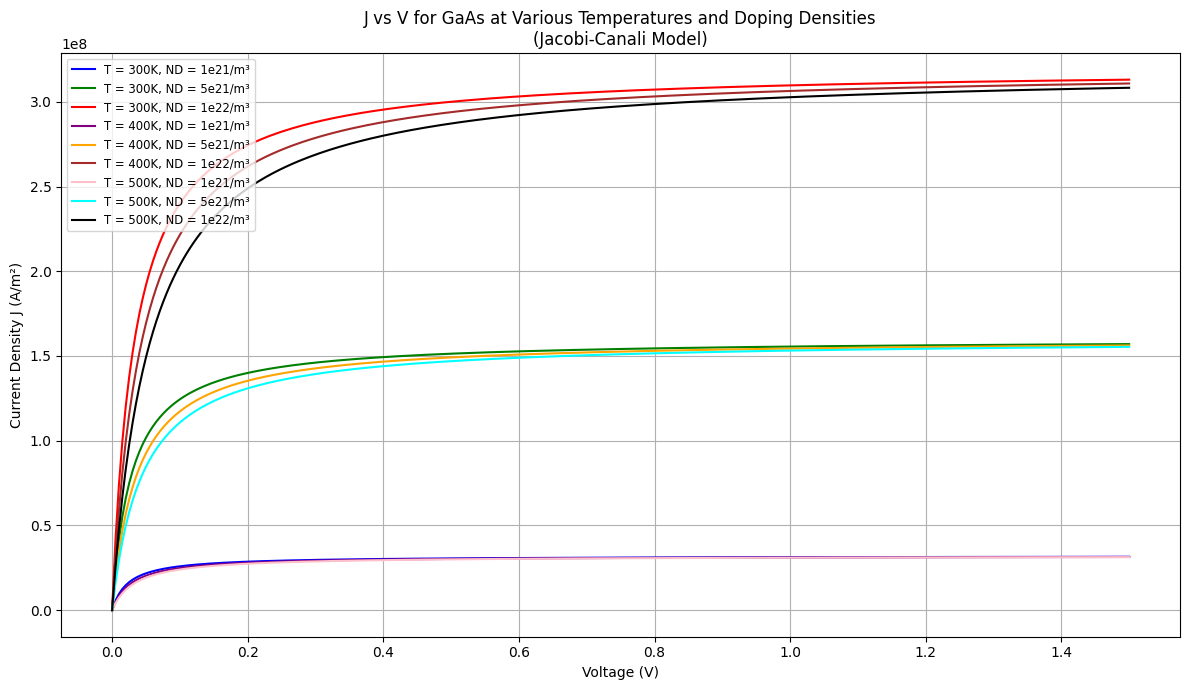

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
q = 1.6e-19  # Charge of electron (C)
L = 100e-9   # Length of the wire (m)
A = 1e-6 * 1e-9  # Cross-sectional area (m^2), not needed for current density
V = np.linspace(0, 1.5, 300)  # Voltage range (V)
E = V / L  # Electric field (V/m)

# Jacobi-Canali mobility model
def mobility(mu0, vsat, beta, E):
    return mu0 / ((1 + (mu0 * E / vsat) ** beta) ** (1 / beta))

# Temperature and doping settings
temperature_labels = ['300K', '400K', '500K']
doping_labels = ['1e21', '5e21', '1e22']  # in m^-3

# GaAs mobility values (example higher values than Silicon)
mobility_values_gaas = {
    '300K': [0.85, 0.70, 0.60],
    '400K': [0.70, 0.55, 0.45],
    '500K': [0.60, 0.45, 0.35]
}

vsat_gaas = 2e5  # Saturation velocity for GaAs (m/s)
beta = 1         # Empirical fitting parameter

# Plotting
plt.figure(figsize=(12, 7))
colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown', 'pink', 'cyan', 'black']

for i, T in enumerate(temperature_labels):
    for j, ND in enumerate(doping_labels):
        mu0 = mobility_values_gaas[T][j]
        n = float(ND)
        mu_E = mobility(mu0, vsat_gaas, beta, E)
        J = q * n * mu_E * E
        label = f"T = {T}, ND = {ND}/m³"
        color_index = i * len(doping_labels) + j
        plt.plot(V, J, label=label, color=colors[color_index % len(colors)])

plt.xlabel("Voltage (V)")
plt.ylabel("Current Density J (A/m²)")
plt.title("J vs V for GaAs at Various Temperatures and Doping Densities\n(Jacobi-Canali Model)")
plt.grid(True)
plt.legend(fontsize='small')
plt.tight_layout()
plt.show()
